In [2]:
import pandas as pd

# Load the dataset
weather_data = pd.read_csv("weatherHistory.csv")

# Convert 'Formatted Date' to datetime
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], utc=True)

# Check for missing values
missing_values = weather_data.isnull().sum()
print(missing_values)

# Summary statistics
summary_statistics = weather_data.describe()
print(summary_statistics)


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       W

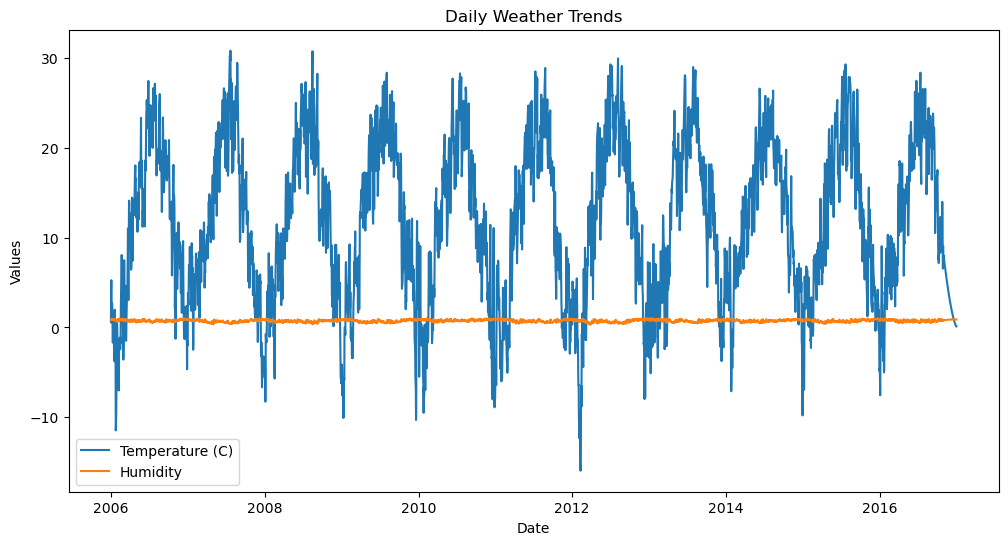

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
weather_data = pd.read_csv("weatherHistory.csv")

# Convert 'Formatted Date' to datetime
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], utc=True)

# Extract only numeric columns for aggregation
numeric_columns = weather_data.select_dtypes(include=['float64', 'int64']).columns

# Add the 'Date' column for daily aggregation
weather_data['Date'] = weather_data['Formatted Date'].dt.date

# Aggregate data by day using mean for numeric columns
daily_data = weather_data.groupby('Date')[numeric_columns].mean().reset_index()

# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Temperature (C)'], label='Temperature (C)')
plt.plot(daily_data['Date'], daily_data['Humidity'], label='Humidity')
# Here, we exclude 'Precip Type' as it's categorical

plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Daily Weather Trends')
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


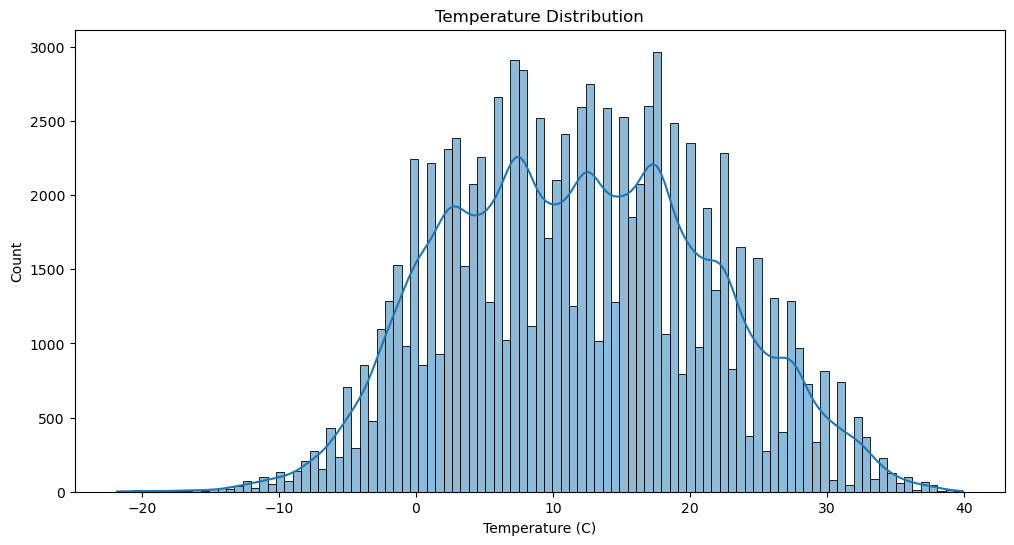

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


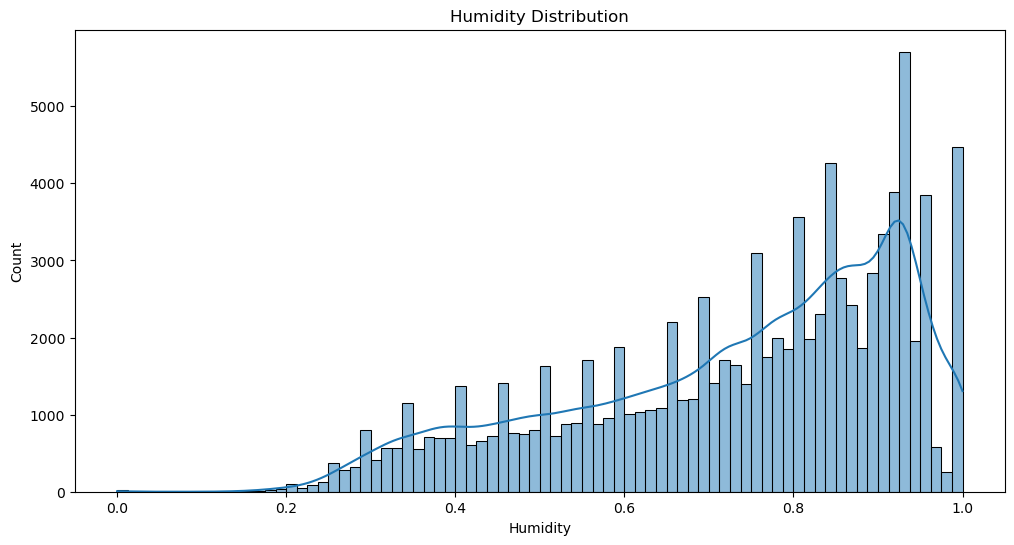

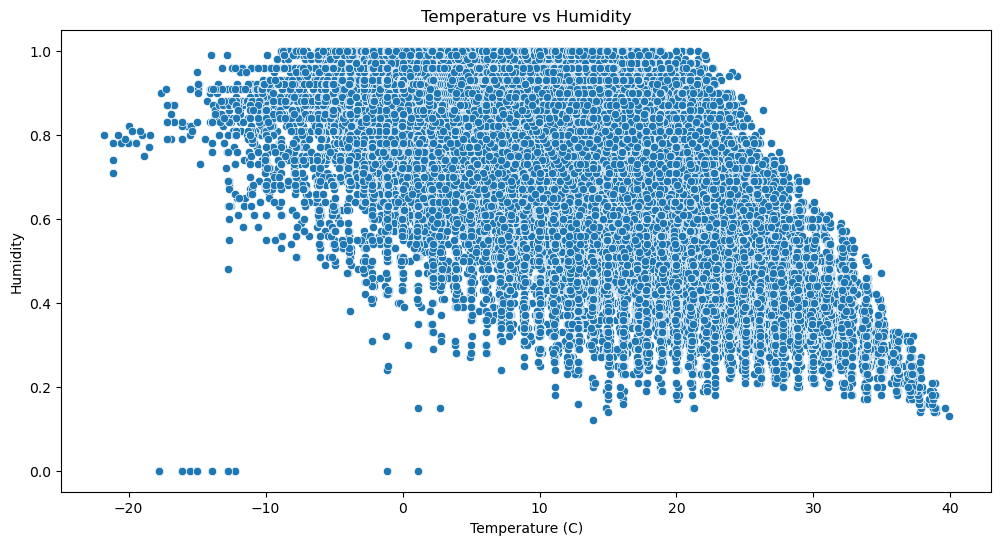

In [5]:
import seaborn as sns

# Distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(weather_data['Temperature (C)'], kde=True)
plt.title('Temperature Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(weather_data['Humidity'], kde=True)
plt.title('Humidity Distribution')
plt.show()

# Scatter plots for relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature (C)', y='Humidity', data=weather_data)
plt.title('Temperature vs Humidity')
plt.show()
